In [1]:
import feature_engine.encoding
import feature_engine.imputation
import feature_engine.pipeline
import feature_engine.selection
import feature_engine.wrappers
import pandas
import pycaret.regression as regression
import sklearn.preprocessing

In [2]:
train = pandas.read_csv("train.csv")
train

,ID_LAT_LON_YEAR_WEEK,latitude,longitude,year,week_no,SulphurDioxide_SO2_column_number_density,SulphurDioxide_SO2_column_number_density_amf,SulphurDioxide_SO2_slant_column_number_density,SulphurDioxide_cloud_fraction,SulphurDioxide_sensor_azimuth_angle,...,Cloud_cloud_top_height,Cloud_cloud_base_pressure,Cloud_cloud_base_height,Cloud_cloud_optical_depth,Cloud_surface_albedo,Cloud_sensor_azimuth_angle,Cloud_sensor_zenith_angle,Cloud_solar_azimuth_angle,Cloud_solar_zenith_angle,emission
0,ID_-0.510_29.290_2019_00,-0.510,29.290,2019,0,-0.000108,0.603019,-0.000065,0.255668,-98.593887,...,3664.436218,61085.809570,2615.120483,15.568533,0.272292,-12.628986,35.632416,-138.786423,30.752140,3.750994
1,ID_-0.510_29.290_2019_01,-0.510,29.290,2019,1,0.000021,0.728214,0.000014,0.130988,16.592861,...,3651.190311,66969.478735,3174.572424,8.690601,0.256830,30.359375,39.557633,-145.183930,27.251779,4.025176
2,ID_-0.510_29.290_2019_02,-0.510,29.290,2019,2,0.000514,0.748199,0.000385,0.110018,72.795837,...,4216.986492,60068.894448,3516.282669,21.103410,0.251101,15.377883,30.401823,-142.519545,26.193296,4.231381
3,ID_-0.510_29.290_2019_03,-0.510,29.290,2019,3,NaN,NaN,NaN,NaN,NaN,...,5228.507736,51064.547339,4180.973322,15.386899,0.262043,-11.293399,24.380357,-132.665828,28.829155,4.305286
4,ID_-0.510_29.290_2019_04,-0.510,29.290,2019,4,-0.000079,0.676296,-0.000048,0.121164,4.121269,...,3980.598120,63751.125781,3355.710107,8.114694,0.235847,38.532263,37.392979,-141.509805,22.204612,4.347317
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79018,ID_-3.299_30.301_2021_48,-3.299,30.301,2021,48,0.000284,1.195643,0.000340,0.191313,72.820518,...,5459.185355,60657.101913,4590.879504,20.245954,0.304797,-35.140368,40.113533,-129.935508,32.095214,29.404171
79019,ID_-3.299_30.301_2021_49,-3.299,30.301,2021,49,0.000083,1.130868,0.000063,0.177222,-12.856753,...,5606.449457,60168.191528,4659.130378,6.104610,0.314015,4.667058,47.528435,-134.252871,30.771469,29.186497
79020,ID_-3.299_30.301_2021_50,-3.299,30.301,2021,50,NaN,NaN,NaN,NaN,NaN,...,6222.646776,56596.027209,5222.646823,14.817885,0.288058,-0.340922,35.328098,-134.731723,30.716166,29.131205
79021,ID_-3.299_30.301_2021_51,-3.299,30.301,2021,51,-0.000034,0.879397,-0.000028,0.184209,-100.344827,...,7896.456885,46533.348194,6946.858022,32.594768,0.274047,8.427699,48.295652,-139.447849,29.112868,28.125792


In [4]:
train.columns

Index(['ID_LAT_LON_YEAR_WEEK', 'latitude', 'longitude', 'year', 'week_no',
       'SulphurDioxide_SO2_column_number_density',
       'SulphurDioxide_SO2_column_number_density_amf',
       'SulphurDioxide_SO2_slant_column_number_density',
       'SulphurDioxide_cloud_fraction', 'SulphurDioxide_sensor_azimuth_angle',
       'SulphurDioxide_sensor_zenith_angle',
       'SulphurDioxide_solar_azimuth_angle',
       'SulphurDioxide_solar_zenith_angle',
       'SulphurDioxide_SO2_column_number_density_15km',
       'CarbonMonoxide_CO_column_number_density',
       'CarbonMonoxide_H2O_column_number_density',
       'CarbonMonoxide_cloud_height', 'CarbonMonoxide_sensor_altitude',
       'CarbonMonoxide_sensor_azimuth_angle',
       'CarbonMonoxide_sensor_zenith_angle',
       'CarbonMonoxide_solar_azimuth_angle',
       'CarbonMonoxide_solar_zenith_angle',
       'NitrogenDioxide_NO2_column_number_density',
       'NitrogenDioxide_tropospheric_NO2_column_number_density',
       'NitrogenDioxide

In [8]:
features_to_drop = ["ID_LAT_LON_YEAR_WEEK",
       'UvAerosolLayerHeight_aerosol_height',
       'UvAerosolLayerHeight_aerosol_pressure',
       'UvAerosolLayerHeight_aerosol_optical_depth',
       'UvAerosolLayerHeight_sensor_zenith_angle',
       'UvAerosolLayerHeight_sensor_azimuth_angle',
       'UvAerosolLayerHeight_solar_azimuth_angle',
       'UvAerosolLayerHeight_solar_zenith_angle']
columns_dropper = feature_engine.selection.DropFeatures(features_to_drop=features_to_drop)
train2 = columns_dropper.fit_transform(train)
train2

,latitude,longitude,year,week_no,SulphurDioxide_SO2_column_number_density,SulphurDioxide_SO2_column_number_density_amf,SulphurDioxide_SO2_slant_column_number_density,SulphurDioxide_cloud_fraction,SulphurDioxide_sensor_azimuth_angle,SulphurDioxide_sensor_zenith_angle,...,Cloud_cloud_top_height,Cloud_cloud_base_pressure,Cloud_cloud_base_height,Cloud_cloud_optical_depth,Cloud_surface_albedo,Cloud_sensor_azimuth_angle,Cloud_sensor_zenith_angle,Cloud_solar_azimuth_angle,Cloud_solar_zenith_angle,emission
0,-0.510,29.290,2019,0,-0.000108,0.603019,-0.000065,0.255668,-98.593887,50.843559,...,3664.436218,61085.809570,2615.120483,15.568533,0.272292,-12.628986,35.632416,-138.786423,30.752140,3.750994
1,-0.510,29.290,2019,1,0.000021,0.728214,0.000014,0.130988,16.592861,39.137194,...,3651.190311,66969.478735,3174.572424,8.690601,0.256830,30.359375,39.557633,-145.183930,27.251779,4.025176
2,-0.510,29.290,2019,2,0.000514,0.748199,0.000385,0.110018,72.795837,52.868816,...,4216.986492,60068.894448,3516.282669,21.103410,0.251101,15.377883,30.401823,-142.519545,26.193296,4.231381
3,-0.510,29.290,2019,3,NaN,NaN,NaN,NaN,NaN,NaN,...,5228.507736,51064.547339,4180.973322,15.386899,0.262043,-11.293399,24.380357,-132.665828,28.829155,4.305286
4,-0.510,29.290,2019,4,-0.000079,0.676296,-0.000048,0.121164,4.121269,35.515587,...,3980.598120,63751.125781,3355.710107,8.114694,0.235847,38.532263,37.392979,-141.509805,22.204612,4.347317
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79018,-3.299,30.301,2021,48,0.000284,1.195643,0.000340,0.191313,72.820518,55.988022,...,5459.185355,60657.101913,4590.879504,20.245954,0.304797,-35.140368,40.113533,-129.935508,32.095214,29.404171
79019,-3.299,30.301,2021,49,0.000083,1.130868,0.000063,0.177222,-12.856753,19.435339,...,5606.449457,60168.191528,4659.130378,6.104610,0.314015,4.667058,47.528435,-134.252871,30.771469,29.186497
79020,-3.299,30.301,2021,50,NaN,NaN,NaN,NaN,NaN,NaN,...,6222.646776,56596.027209,5222.646823,14.817885,0.288058,-0.340922,35.328098,-134.731723,30.716166,29.131205
79021,-3.299,30.301,2021,51,-0.000034,0.879397,-0.000028,0.184209,-100.344827,32.599393,...,7896.456885,46533.348194,6946.858022,32.594768,0.274047,8.427699,48.295652,-139.447849,29.112868,28.125792


In [9]:
train3 = train2.dropna()
train3

,latitude,longitude,year,week_no,SulphurDioxide_SO2_column_number_density,SulphurDioxide_SO2_column_number_density_amf,SulphurDioxide_SO2_slant_column_number_density,SulphurDioxide_cloud_fraction,SulphurDioxide_sensor_azimuth_angle,SulphurDioxide_sensor_zenith_angle,...,Cloud_cloud_top_height,Cloud_cloud_base_pressure,Cloud_cloud_base_height,Cloud_cloud_optical_depth,Cloud_surface_albedo,Cloud_sensor_azimuth_angle,Cloud_sensor_zenith_angle,Cloud_solar_azimuth_angle,Cloud_solar_zenith_angle,emission
1,-0.510,29.290,2019,1,0.000021,0.728214,0.000014,0.130988,16.592861,39.137194,...,3651.190311,66969.478735,3174.572424,8.690601,0.256830,30.359375,39.557633,-145.183930,27.251779,4.025176
2,-0.510,29.290,2019,2,0.000514,0.748199,0.000385,0.110018,72.795837,52.868816,...,4216.986492,60068.894448,3516.282669,21.103410,0.251101,15.377883,30.401823,-142.519545,26.193296,4.231381
4,-0.510,29.290,2019,4,-0.000079,0.676296,-0.000048,0.121164,4.121269,35.515587,...,3980.598120,63751.125781,3355.710107,8.114694,0.235847,38.532263,37.392979,-141.509805,22.204612,4.347317
5,-0.510,29.290,2019,5,0.000294,0.871713,0.000242,0.227656,-13.453690,57.097124,...,5530.354546,49846.001010,4495.301362,7.556143,0.250228,30.128401,37.007020,-137.388719,21.157820,4.310819
6,-0.510,29.290,2019,6,-0.000285,0.791956,-0.000226,0.119397,72.198647,58.496368,...,4378.614648,58804.276563,3537.050659,10.493107,0.240828,4.585368,30.491541,-128.196338,21.721202,4.269334
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79017,-3.299,30.301,2021,47,-0.000257,0.668691,-0.000172,0.257957,71.891731,65.816658,...,6894.667968,53218.918203,5894.667968,25.124038,0.308299,24.648991,38.736509,-129.933645,29.499534,30.297634
79018,-3.299,30.301,2021,48,0.000284,1.195643,0.000340,0.191313,72.820518,55.988022,...,5459.185355,60657.101913,4590.879504,20.245954,0.304797,-35.140368,40.113533,-129.935508,32.095214,29.404171
79019,-3.299,30.301,2021,49,0.000083,1.130868,0.000063,0.177222,-12.856753,19.435339,...,5606.449457,60168.191528,4659.130378,6.104610,0.314015,4.667058,47.528435,-134.252871,30.771469,29.186497
79021,-3.299,30.301,2021,51,-0.000034,0.879397,-0.000028,0.184209,-100.344827,32.599393,...,7896.456885,46533.348194,6946.858022,32.594768,0.274047,8.427699,48.295652,-139.447849,29.112868,28.125792


In [13]:
train3.isnull().sum()

latitude                                    0
longitude                                   0
year                                        0
week_no                                     0
SulphurDioxide_SO2_column_number_density    0
                                           ..
Cloud_sensor_azimuth_angle                  0
Cloud_sensor_zenith_angle                   0
Cloud_solar_azimuth_angle                   0
Cloud_solar_zenith_angle                    0
emission                                    0
Length: 68, dtype: int64

In [12]:
X_train = train3.drop(columns=["emission"])
X_train

,latitude,longitude,year,week_no,SulphurDioxide_SO2_column_number_density,SulphurDioxide_SO2_column_number_density_amf,SulphurDioxide_SO2_slant_column_number_density,SulphurDioxide_cloud_fraction,SulphurDioxide_sensor_azimuth_angle,SulphurDioxide_sensor_zenith_angle,...,Cloud_cloud_top_pressure,Cloud_cloud_top_height,Cloud_cloud_base_pressure,Cloud_cloud_base_height,Cloud_cloud_optical_depth,Cloud_surface_albedo,Cloud_sensor_azimuth_angle,Cloud_sensor_zenith_angle,Cloud_solar_azimuth_angle,Cloud_solar_zenith_angle
1,-0.510,29.290,2019,1,0.000021,0.728214,0.000014,0.130988,16.592861,39.137194,...,63790.296241,3651.190311,66969.478735,3174.572424,8.690601,0.256830,30.359375,39.557633,-145.183930,27.251779
2,-0.510,29.290,2019,2,0.000514,0.748199,0.000385,0.110018,72.795837,52.868816,...,55923.790554,4216.986492,60068.894448,3516.282669,21.103410,0.251101,15.377883,30.401823,-142.519545,26.193296
4,-0.510,29.290,2019,4,-0.000079,0.676296,-0.000048,0.121164,4.121269,35.515587,...,59904.314844,3980.598120,63751.125781,3355.710107,8.114694,0.235847,38.532263,37.392979,-141.509805,22.204612
5,-0.510,29.290,2019,5,0.000294,0.871713,0.000242,0.227656,-13.453690,57.097124,...,43494.921743,5530.354546,49846.001010,4495.301362,7.556143,0.250228,30.128401,37.007020,-137.388719,21.157820
6,-0.510,29.290,2019,6,-0.000285,0.791956,-0.000226,0.119397,72.198647,58.496368,...,53483.783984,4378.614648,58804.276563,3537.050659,10.493107,0.240828,4.585368,30.491541,-128.196338,21.721202
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79017,-3.299,30.301,2021,47,-0.000257,0.668691,-0.000172,0.257957,71.891731,65.816658,...,47198.775641,6894.667968,53218.918203,5894.667968,25.124038,0.308299,24.648991,38.736509,-129.933645,29.499534
79018,-3.299,30.301,2021,48,0.000284,1.195643,0.000340,0.191313,72.820518,55.988022,...,54703.511452,5459.185355,60657.101913,4590.879504,20.245954,0.304797,-35.140368,40.113533,-129.935508,32.095214
79019,-3.299,30.301,2021,49,0.000083,1.130868,0.000063,0.177222,-12.856753,19.435339,...,53983.493958,5606.449457,60168.191528,4659.130378,6.104610,0.314015,4.667058,47.528435,-134.252871,30.771469
79021,-3.299,30.301,2021,51,-0.000034,0.879397,-0.000028,0.184209,-100.344827,32.599393,...,41395.313100,7896.456885,46533.348194,6946.858022,32.594768,0.274047,8.427699,48.295652,-139.447849,29.112868


In [14]:
y_train = train3[["emission"]]
y_train

,emission
1,4.025176
2,4.231381
4,4.347317
5,4.310819
6,4.269334
...,...
79017,30.297634
79018,29.404171
79019,29.186497
79021,28.125792


In [16]:
X_scaler = feature_engine.wrappers.SklearnTransformerWrapper(transformer=sklearn.preprocessing.MinMaxScaler())
X_train_scaled = X_scaler.fit_transform(X_train)
X_train_scaled

,latitude,longitude,year,week_no,SulphurDioxide_SO2_column_number_density,SulphurDioxide_SO2_column_number_density_amf,SulphurDioxide_SO2_slant_column_number_density,SulphurDioxide_cloud_fraction,SulphurDioxide_sensor_azimuth_angle,SulphurDioxide_sensor_zenith_angle,...,Cloud_cloud_top_pressure,Cloud_cloud_top_height,Cloud_cloud_base_pressure,Cloud_cloud_base_height,Cloud_cloud_optical_depth,Cloud_surface_albedo,Cloud_sensor_azimuth_angle,Cloud_sensor_zenith_angle,Cloud_solar_azimuth_angle,Cloud_solar_zenith_angle
1,1.0,0.321429,0.0,0.019231,0.210985,0.272945,0.194106,0.436662,0.650229,0.590207,...,0.624838,0.229453,0.653988,0.205548,0.034856,0.410969,0.734172,0.578440,0.057407,0.504646
2,1.0,0.321429,0.0,0.038462,0.313414,0.286315,0.274069,0.366756,0.836558,0.797813,...,0.509103,0.279376,0.547023,0.238615,0.098055,0.401123,0.650967,0.432203,0.077903,0.469240
4,1.0,0.321429,0.0,0.076923,0.190381,0.238214,0.180911,0.403912,0.608882,0.535453,...,0.567666,0.258518,0.604101,0.223076,0.031924,0.374908,0.779563,0.543866,0.085671,0.335817
5,1.0,0.321429,0.0,0.096154,0.267802,0.368943,0.243248,0.758911,0.550615,0.861740,...,0.326244,0.395258,0.388559,0.333355,0.029080,0.399624,0.732889,0.537702,0.117373,0.300802
6,1.0,0.321429,0.0,0.115385,0.147532,0.315587,0.142490,0.398020,0.834578,0.882895,...,0.473204,0.293637,0.527420,0.240625,0.044034,0.383469,0.591026,0.433636,0.188087,0.319647
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79017,0.0,0.627421,1.0,0.903846,0.153369,0.233126,0.154121,0.859923,0.833561,0.993569,...,0.380737,0.515636,0.440842,0.468772,0.118526,0.499423,0.702457,0.565325,0.174723,0.579834
79018,0.0,0.627421,1.0,0.923077,0.265653,0.585644,0.264341,0.637760,0.836640,0.844972,...,0.491150,0.388979,0.556141,0.342604,0.093689,0.493403,0.370395,0.587319,0.174708,0.666661
79019,0.0,0.627421,1.0,0.942308,0.223974,0.542311,0.204810,0.590787,0.552594,0.292339,...,0.480556,0.401973,0.548562,0.349209,0.021690,0.509246,0.591480,0.705750,0.141496,0.622381
79021,0.0,0.627421,1.0,0.980769,0.199686,0.374083,0.185155,0.614079,0.262546,0.491364,...,0.295354,0.604028,0.337210,0.570593,0.156562,0.440558,0.612366,0.718004,0.101533,0.566900


In [17]:
y_scaler = feature_engine.wrappers.SklearnTransformerWrapper(transformer=sklearn.preprocessing.MinMaxScaler())
y_train_scaled = y_scaler.fit_transform(y_train)
y_train_scaled

,emission
1,0.001271
2,0.001336
4,0.001372
5,0.001361
6,0.001348
...,...
79017,0.009564
79018,0.009282
79019,0.009214
79021,0.008879


In [18]:
Xy_train_scaled = X_train_scaled.copy()
Xy_train_scaled = Xy_train_scaled.join(y_train_scaled)
Xy_train_scaled

,latitude,longitude,year,week_no,SulphurDioxide_SO2_column_number_density,SulphurDioxide_SO2_column_number_density_amf,SulphurDioxide_SO2_slant_column_number_density,SulphurDioxide_cloud_fraction,SulphurDioxide_sensor_azimuth_angle,SulphurDioxide_sensor_zenith_angle,...,Cloud_cloud_top_height,Cloud_cloud_base_pressure,Cloud_cloud_base_height,Cloud_cloud_optical_depth,Cloud_surface_albedo,Cloud_sensor_azimuth_angle,Cloud_sensor_zenith_angle,Cloud_solar_azimuth_angle,Cloud_solar_zenith_angle,emission
1,1.0,0.321429,0.0,0.019231,0.210985,0.272945,0.194106,0.436662,0.650229,0.590207,...,0.229453,0.653988,0.205548,0.034856,0.410969,0.734172,0.578440,0.057407,0.504646,0.001271
2,1.0,0.321429,0.0,0.038462,0.313414,0.286315,0.274069,0.366756,0.836558,0.797813,...,0.279376,0.547023,0.238615,0.098055,0.401123,0.650967,0.432203,0.077903,0.469240,0.001336
4,1.0,0.321429,0.0,0.076923,0.190381,0.238214,0.180911,0.403912,0.608882,0.535453,...,0.258518,0.604101,0.223076,0.031924,0.374908,0.779563,0.543866,0.085671,0.335817,0.001372
5,1.0,0.321429,0.0,0.096154,0.267802,0.368943,0.243248,0.758911,0.550615,0.861740,...,0.395258,0.388559,0.333355,0.029080,0.399624,0.732889,0.537702,0.117373,0.300802,0.001361
6,1.0,0.321429,0.0,0.115385,0.147532,0.315587,0.142490,0.398020,0.834578,0.882895,...,0.293637,0.527420,0.240625,0.044034,0.383469,0.591026,0.433636,0.188087,0.319647,0.001348
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79017,0.0,0.627421,1.0,0.903846,0.153369,0.233126,0.154121,0.859923,0.833561,0.993569,...,0.515636,0.440842,0.468772,0.118526,0.499423,0.702457,0.565325,0.174723,0.579834,0.009564
79018,0.0,0.627421,1.0,0.923077,0.265653,0.585644,0.264341,0.637760,0.836640,0.844972,...,0.388979,0.556141,0.342604,0.093689,0.493403,0.370395,0.587319,0.174708,0.666661,0.009282
79019,0.0,0.627421,1.0,0.942308,0.223974,0.542311,0.204810,0.590787,0.552594,0.292339,...,0.401973,0.548562,0.349209,0.021690,0.509246,0.591480,0.705750,0.141496,0.622381,0.009214
79021,0.0,0.627421,1.0,0.980769,0.199686,0.374083,0.185155,0.614079,0.262546,0.491364,...,0.604028,0.337210,0.570593,0.156562,0.440558,0.612366,0.718004,0.101533,0.566900,0.008879


In [19]:
regression.setup(Xy_train_scaled, target="emission")

,Description,Value
0,Session id,5772
1,Target,emission
2,Target type,Regression
3,Original data shape,"(57209, 68)"
4,Transformed data shape,"(57209, 68)"
5,Transformed train set shape,"(40046, 68)"
6,Transformed test set shape,"(17163, 68)"
7,Numeric features,67
8,Preprocess,True
9,Imputation type,simple


In [20]:
# regression.compare_models(budget_time=1)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
rf,Random Forest Regressor,0.0030,0.0001,0.0073,0.9698,0.0065,0.2597,32.3560
dt,Decision Tree Regressor,0.0037,0.0001,0.0100,0.9430,0.0091,0.1475,0.5790
lr,Linear Regression,0.0214,0.0018,0.0421,0.0340,0.0353,90.6538,0.5320
ridge,Ridge Regression,0.0214,0.0018,0.0421,0.0339,0.0353,90.3538,0.0560
br,Bayesian Ridge,0.0214,0.0018,0.0421,0.0339,0.0353,90.3694,0.1080
omp,Orthogonal Matching Pursuit,0.0219,0.0018,0.0424,0.0194,0.0356,96.0497,0.0540
huber,Huber Regressor,0.0198,0.0019,0.0428,0.0019,0.0359,56.5946,1.1860
lasso,Lasso Regression,0.0228,0.0019,0.0428,-0.0010,0.0361,116.4334,0.2820
en,Elastic Net,0.0228,0.0019,0.0428,-0.0010,0.0361,116.4334,0.0550
llar,Lasso Least Angle Regression,0.0228,0.0019,0.0428,-0.0010,0.0361,116.4334,0.0590


RandomForestRegressor(n_jobs=-1, random_state=5772)

In [21]:
model = regression.create_model("dt")

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.0038,0.0001,0.0102,0.9342,0.0094,0.1519
1,0.0039,0.0001,0.0109,0.9376,0.0099,0.1451
2,0.0036,0.0001,0.0100,0.9317,0.0092,0.1473
3,0.0036,0.0001,0.0091,0.9062,0.0085,0.1811
4,0.0038,0.0001,0.0104,0.9520,0.0095,0.1487
5,0.0036,0.0001,0.0093,0.9608,0.0085,0.1442
6,0.0037,0.0001,0.0096,0.9566,0.0087,0.1394
7,0.0036,0.0001,0.0098,0.9609,0.0087,0.1288
8,0.0037,0.0001,0.0098,0.9471,0.0090,0.1455


In [22]:
tuned_model = regression.tune_model(model)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.0159,0.0007,0.0261,0.5676,0.0243,33.4207
1,0.0156,0.0009,0.0296,0.5392,0.0259,29.4452
2,0.0151,0.0009,0.0305,0.3587,0.0260,30.4168
3,0.0147,0.0005,0.0230,0.4000,0.0217,29.0562
4,0.0157,0.0010,0.0320,0.5437,0.0271,28.0641
5,0.0155,0.0008,0.0287,0.6237,0.0252,30.9118
6,0.0162,0.0009,0.0294,0.5931,0.0262,25.3904
7,0.0158,0.0013,0.0361,0.4726,0.0294,27.0377
8,0.0149,0.0006,0.0242,0.6798,0.0226,25.8927


Fitting 10 folds for each of 10 candidates, totalling 100 fits
Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


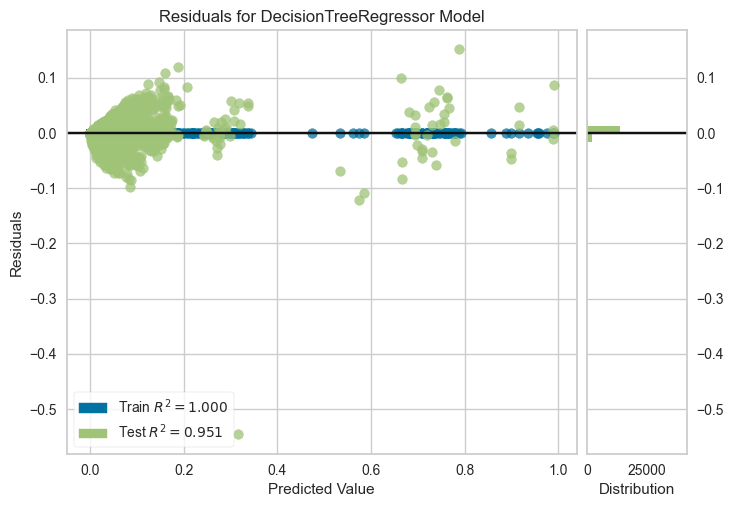

In [23]:
regression.plot_model(model)

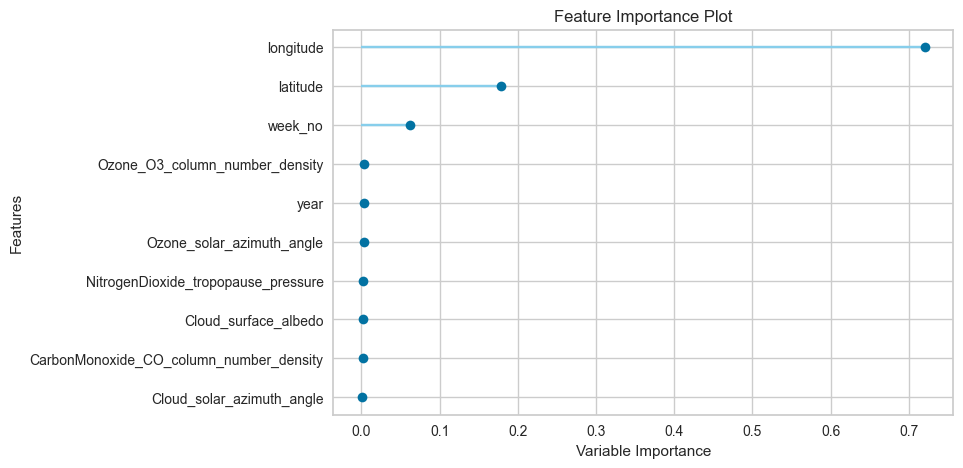

In [24]:
regression.plot_model(model, plot="feature")

In [25]:
final_model = regression.finalize_model(model)

In [26]:
test_df = pandas.read_csv("test.csv")
test_df

,ID_LAT_LON_YEAR_WEEK,latitude,longitude,year,week_no,SulphurDioxide_SO2_column_number_density,SulphurDioxide_SO2_column_number_density_amf,SulphurDioxide_SO2_slant_column_number_density,SulphurDioxide_cloud_fraction,SulphurDioxide_sensor_azimuth_angle,...,Cloud_cloud_top_pressure,Cloud_cloud_top_height,Cloud_cloud_base_pressure,Cloud_cloud_base_height,Cloud_cloud_optical_depth,Cloud_surface_albedo,Cloud_sensor_azimuth_angle,Cloud_sensor_zenith_angle,Cloud_solar_azimuth_angle,Cloud_solar_zenith_angle
0,ID_-0.510_29.290_2022_00,-0.510,29.290,2022,0,NaN,NaN,NaN,NaN,NaN,...,36022.027344,8472.313477,41047.937500,7472.313477,7.935617,0.240773,-100.113792,33.697044,-133.047546,33.779583
1,ID_-0.510_29.290_2022_01,-0.510,29.290,2022,1,0.000456,0.691164,0.000316,0.000000,76.239196,...,48539.737242,6476.147323,54915.708579,5476.147161,11.448437,0.293119,-30.510319,42.402593,-138.632822,31.012380
2,ID_-0.510_29.290_2022_02,-0.510,29.290,2022,2,0.000161,0.605107,0.000106,0.079870,-42.055341,...,34133.080469,8984.795703,39006.093750,7984.795703,10.753179,0.267130,39.087361,45.936480,-144.784988,26.743361
3,ID_-0.510_29.290_2022_03,-0.510,29.290,2022,3,0.000350,0.696917,0.000243,0.201028,72.169566,...,50854.991076,6014.724059,57646.368368,5014.724115,11.764556,0.304679,-24.465127,42.140419,-135.027891,29.604774
4,ID_-0.510_29.290_2022_04,-0.510,29.290,2022,4,-0.000317,0.580527,-0.000184,0.204352,76.190865,...,46594.685145,6849.280477,52896.541873,5849.280394,13.065317,0.284221,-12.907850,30.122641,-135.500119,26.276807
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24348,ID_-3.299_30.301_2022_44,-3.299,30.301,2022,44,-0.000618,0.745549,-0.000461,0.234492,72.306198,...,48839.430415,6260.120033,55483.459980,5260.120056,30.398508,0.180046,-25.528588,45.284576,-116.521412,29.992562
24349,ID_-3.299_30.301_2022_45,-3.299,30.301,2022,45,NaN,NaN,NaN,NaN,NaN,...,47042.694849,6678.843299,53589.917383,5678.951521,19.223844,0.177833,-13.380005,43.770351,-122.405759,29.017975
24350,ID_-3.299_30.301_2022_46,-3.299,30.301,2022,46,NaN,NaN,NaN,NaN,NaN,...,55337.148173,5336.282475,62646.761340,4336.282491,13.801194,0.219471,-5.072065,33.226455,-124.530639,30.187472
24351,ID_-3.299_30.301_2022_47,-3.299,30.301,2022,47,0.000071,1.003805,0.000077,0.205077,74.327427,...,44813.691428,7188.578533,50728.313991,6188.578464,27.887489,0.247275,-0.668714,45.885617,-129.006797,30.427455


In [30]:
tmp = test_df.copy()
tmp["emission"] = 0
test2 = columns_dropper.transform(tmp)
test2 = test2.drop(columns=["emission"])
test2

,latitude,longitude,year,week_no,SulphurDioxide_SO2_column_number_density,SulphurDioxide_SO2_column_number_density_amf,SulphurDioxide_SO2_slant_column_number_density,SulphurDioxide_cloud_fraction,SulphurDioxide_sensor_azimuth_angle,SulphurDioxide_sensor_zenith_angle,...,Cloud_cloud_top_pressure,Cloud_cloud_top_height,Cloud_cloud_base_pressure,Cloud_cloud_base_height,Cloud_cloud_optical_depth,Cloud_surface_albedo,Cloud_sensor_azimuth_angle,Cloud_sensor_zenith_angle,Cloud_solar_azimuth_angle,Cloud_solar_zenith_angle
0,-0.510,29.290,2022,0,NaN,NaN,NaN,NaN,NaN,NaN,...,36022.027344,8472.313477,41047.937500,7472.313477,7.935617,0.240773,-100.113792,33.697044,-133.047546,33.779583
1,-0.510,29.290,2022,1,0.000456,0.691164,0.000316,0.000000,76.239196,15.600607,...,48539.737242,6476.147323,54915.708579,5476.147161,11.448437,0.293119,-30.510319,42.402593,-138.632822,31.012380
2,-0.510,29.290,2022,2,0.000161,0.605107,0.000106,0.079870,-42.055341,39.889060,...,34133.080469,8984.795703,39006.093750,7984.795703,10.753179,0.267130,39.087361,45.936480,-144.784988,26.743361
3,-0.510,29.290,2022,3,0.000350,0.696917,0.000243,0.201028,72.169566,58.862543,...,50854.991076,6014.724059,57646.368368,5014.724115,11.764556,0.304679,-24.465127,42.140419,-135.027891,29.604774
4,-0.510,29.290,2022,4,-0.000317,0.580527,-0.000184,0.204352,76.190865,15.646016,...,46594.685145,6849.280477,52896.541873,5849.280394,13.065317,0.284221,-12.907850,30.122641,-135.500119,26.276807
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24348,-3.299,30.301,2022,44,-0.000618,0.745549,-0.000461,0.234492,72.306198,61.114494,...,48839.430415,6260.120033,55483.459980,5260.120056,30.398508,0.180046,-25.528588,45.284576,-116.521412,29.992562
24349,-3.299,30.301,2022,45,NaN,NaN,NaN,NaN,NaN,NaN,...,47042.694849,6678.843299,53589.917383,5678.951521,19.223844,0.177833,-13.380005,43.770351,-122.405759,29.017975
24350,-3.299,30.301,2022,46,NaN,NaN,NaN,NaN,NaN,NaN,...,55337.148173,5336.282475,62646.761340,4336.282491,13.801194,0.219471,-5.072065,33.226455,-124.530639,30.187472
24351,-3.299,30.301,2022,47,0.000071,1.003805,0.000077,0.205077,74.327427,38.215228,...,44813.691428,7188.578533,50728.313991,6188.578464,27.887489,0.247275,-0.668714,45.885617,-129.006797,30.427455


In [31]:
test_scaled = X_scaler.transform(test2)
test_scaled

,latitude,longitude,year,week_no,SulphurDioxide_SO2_column_number_density,SulphurDioxide_SO2_column_number_density_amf,SulphurDioxide_SO2_slant_column_number_density,SulphurDioxide_cloud_fraction,SulphurDioxide_sensor_azimuth_angle,SulphurDioxide_sensor_zenith_angle,...,Cloud_cloud_top_pressure,Cloud_cloud_top_height,Cloud_cloud_base_pressure,Cloud_cloud_base_height,Cloud_cloud_optical_depth,Cloud_surface_albedo,Cloud_sensor_azimuth_angle,Cloud_sensor_zenith_angle,Cloud_solar_azimuth_angle,Cloud_solar_zenith_angle
0,1.0,0.321429,1.5,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,...,0.216299,0.654838,0.252182,0.621442,0.031012,0.383373,0.009542,0.484835,0.150768,0.723003
1,1.0,0.321429,1.5,0.019231,0.301333,0.248160,0.259178,0.000000,0.847974,0.234362,...,0.400465,0.478709,0.467144,0.428272,0.048898,0.473334,0.396110,0.623880,0.107802,0.630440
2,1.0,0.321429,1.5,0.038462,0.240042,0.190590,0.213977,0.266253,0.455792,0.601575,...,0.188508,0.700056,0.220532,0.671035,0.045358,0.428670,0.782646,0.680323,0.060476,0.487640
3,1.0,0.321429,1.5,0.057692,0.279349,0.252009,0.243562,0.670146,0.834482,0.888431,...,0.434529,0.437996,0.509472,0.383620,0.050507,0.493202,0.429684,0.619693,0.135534,0.583355
4,1.0,0.321429,1.5,0.076923,0.140956,0.174147,0.151522,0.681228,0.847814,0.235049,...,0.371849,0.511632,0.435845,0.464380,0.057130,0.458043,0.493872,0.427744,0.131901,0.472033
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24348,0.0,0.627421,1.5,0.846154,0.078497,0.284542,0.091892,0.781701,0.834935,0.922478,...,0.404875,0.459648,0.475945,0.407367,0.145380,0.279010,0.423778,0.669911,0.277899,0.596326
24349,0.0,0.627421,1.5,0.865385,NaN,NaN,NaN,NaN,NaN,NaN,...,0.378440,0.496594,0.446593,0.447897,0.088485,0.275207,0.491249,0.645726,0.232632,0.563726
24350,0.0,0.627421,1.5,0.884615,NaN,NaN,NaN,NaN,NaN,NaN,...,0.500472,0.378135,0.586982,0.317967,0.060876,0.346765,0.537390,0.477318,0.216286,0.602846
24351,0.0,0.627421,1.5,0.903846,0.221425,0.457309,0.207834,0.683645,0.841636,0.576268,...,0.345646,0.541569,0.402236,0.497214,0.132596,0.394547,0.561846,0.679511,0.181853,0.610874


In [33]:
predicted = regression.predict_model(final_model, test_scaled)
predicted

,latitude,longitude,year,week_no,SulphurDioxide_SO2_column_number_density,SulphurDioxide_SO2_column_number_density_amf,SulphurDioxide_SO2_slant_column_number_density,SulphurDioxide_cloud_fraction,SulphurDioxide_sensor_azimuth_angle,SulphurDioxide_sensor_zenith_angle,...,Cloud_cloud_top_height,Cloud_cloud_base_pressure,Cloud_cloud_base_height,Cloud_cloud_optical_depth,Cloud_surface_albedo,Cloud_sensor_azimuth_angle,Cloud_sensor_zenith_angle,Cloud_solar_azimuth_angle,Cloud_solar_zenith_angle,prediction_label
0,1.0,0.321429,1.5,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,...,0.654837,0.252182,0.621441,0.031012,0.383373,0.009542,0.484835,0.150768,0.723003,0.001254
1,1.0,0.321429,1.5,0.019231,0.301333,0.248160,0.259178,0.000000,0.847974,0.234362,...,0.478709,0.467144,0.428272,0.048898,0.473334,0.396110,0.623880,0.107802,0.630440,0.001363
2,1.0,0.321429,1.5,0.038462,0.240042,0.190590,0.213977,0.266253,0.455792,0.601575,...,0.700056,0.220532,0.671035,0.045358,0.428670,0.782646,0.680323,0.060476,0.487640,0.001276
3,1.0,0.321429,1.5,0.057692,0.279349,0.252009,0.243562,0.670146,0.834482,0.888431,...,0.437996,0.509472,0.383620,0.050507,0.493202,0.429684,0.619693,0.135534,0.583355,0.001289
4,1.0,0.321429,1.5,0.076923,0.140956,0.174147,0.151522,0.681228,0.847814,0.235049,...,0.511632,0.435845,0.464380,0.057130,0.458043,0.493872,0.427744,0.131901,0.472033,0.001341
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24348,0.0,0.627421,1.5,0.846154,0.078497,0.284542,0.091892,0.781701,0.834935,0.922478,...,0.459648,0.475945,0.407367,0.145380,0.279010,0.423778,0.669911,0.277899,0.596326,0.008366
24349,0.0,0.627421,1.5,0.865385,NaN,NaN,NaN,NaN,NaN,NaN,...,0.496594,0.446593,0.447897,0.088485,0.275207,0.491249,0.645726,0.232632,0.563726,0.008412
24350,0.0,0.627421,1.5,0.884615,NaN,NaN,NaN,NaN,NaN,NaN,...,0.378135,0.586982,0.317967,0.060876,0.346765,0.537390,0.477318,0.216286,0.602846,0.008457
24351,0.0,0.627421,1.5,0.903846,0.221425,0.457309,0.207834,0.683645,0.841636,0.576268,...,0.541569,0.402236,0.497214,0.132596,0.394547,0.561846,0.679511,0.181853,0.610874,0.009166


In [36]:
y_scaled = predicted[["prediction_label"]].copy()
y_scaled.columns = ["emission"]
y_scaled

,emission
0,0.001254
1,0.001363
2,0.001276
3,0.001289
4,0.001341
...,...
24348,0.008366
24349,0.008412
24350,0.008457
24351,0.009166


In [37]:
y_inversed = y_scaler.inverse_transform(y_scaled)
y_inversed

,emission
0,3.971814
1,4.316684
2,4.041007
3,4.083173
4,4.247256
...,...
24348,26.502529
24349,26.646907
24350,26.789497
24351,29.035373


In [38]:
submit = test_df[["ID_LAT_LON_YEAR_WEEK"]].copy()
submit = submit.join(y_inversed)
submit

,ID_LAT_LON_YEAR_WEEK,emission
0,ID_-0.510_29.290_2022_00,3.971814
1,ID_-0.510_29.290_2022_01,4.316684
2,ID_-0.510_29.290_2022_02,4.041007
3,ID_-0.510_29.290_2022_03,4.083173
4,ID_-0.510_29.290_2022_04,4.247256
...,...,...
24348,ID_-3.299_30.301_2022_44,26.502529
24349,ID_-3.299_30.301_2022_45,26.646907
24350,ID_-3.299_30.301_2022_46,26.789497
24351,ID_-3.299_30.301_2022_47,29.035373


In [39]:
submit.to_csv("submit.csv", index=False)